### Multiple Regression

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics

In [24]:
ocean = pd.read_csv('ocean1.csv', index_col=0)
ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salnty       2000 non-null   float64
 1   Depthm       2000 non-null   int64  
 2   T_degC       2000 non-null   float64
 3   O2ml_L       2000 non-null   float64
 4   STheta       2000 non-null   float64
 5   O2Sat        2000 non-null   float64
 6   Oxy_µmol/Kg  2000 non-null   float64
 7   Year         2000 non-null   int64  
 8   Month        2000 non-null   int64  
 9   Bottom_D     2000 non-null   float64
 10  Wea          2000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 187.5 KB


In [25]:
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

In [26]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_36174/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_36174/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_36174/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,Bottom_D,Year_2005,Year_2006,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,0.70,26.936,10.0,30.44201,3935.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,2.08,26.415,32.2,90.50218,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,1.75,26.528,26.8,76.13528,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,1.20,26.621,18.3,52.20232,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,0.70,26.759,10.5,30.44726,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,21.8,63.08076,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,1.12,26.685,16.7,48.71913,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,0.72,26.794,10.6,31.31612,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,0.40,26.966,5.7,17.39493,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [2.39309681]
Coefficients: 
 [[ 3.24056499e-05  1.56338735e-01  2.74827923e+01  1.14634243e+00
   4.14283872e-02 -6.46222063e-01  1.70117271e-07  1.01334858e-03
   6.24674313e-04  3.14955108e-03 -3.95143650e-04 -2.90835347e-03
   2.89043467e-03  1.12198723e-02  2.01232327e-01  1.81928522e-03
   7.35544240e-04  1.01926536e-03  5.32453286e-03  3.10281060e-03
   1.09595772e-02 -5.98193791e-04  1.09417227e-03  1.67715414e-03
   8.65210827e-04  6.82325667e-04 -3.85546729e-03  1.94843570e-03
   4.42997297e-04]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:11:01   Log-Likelihood:                 7012.3
No

In [29]:
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.61
Mean Absolute Error: 0.004887305668804381
Mean Square Error: 0.0002015434138962788
Root Mean Square Error: 0.014196598673494957


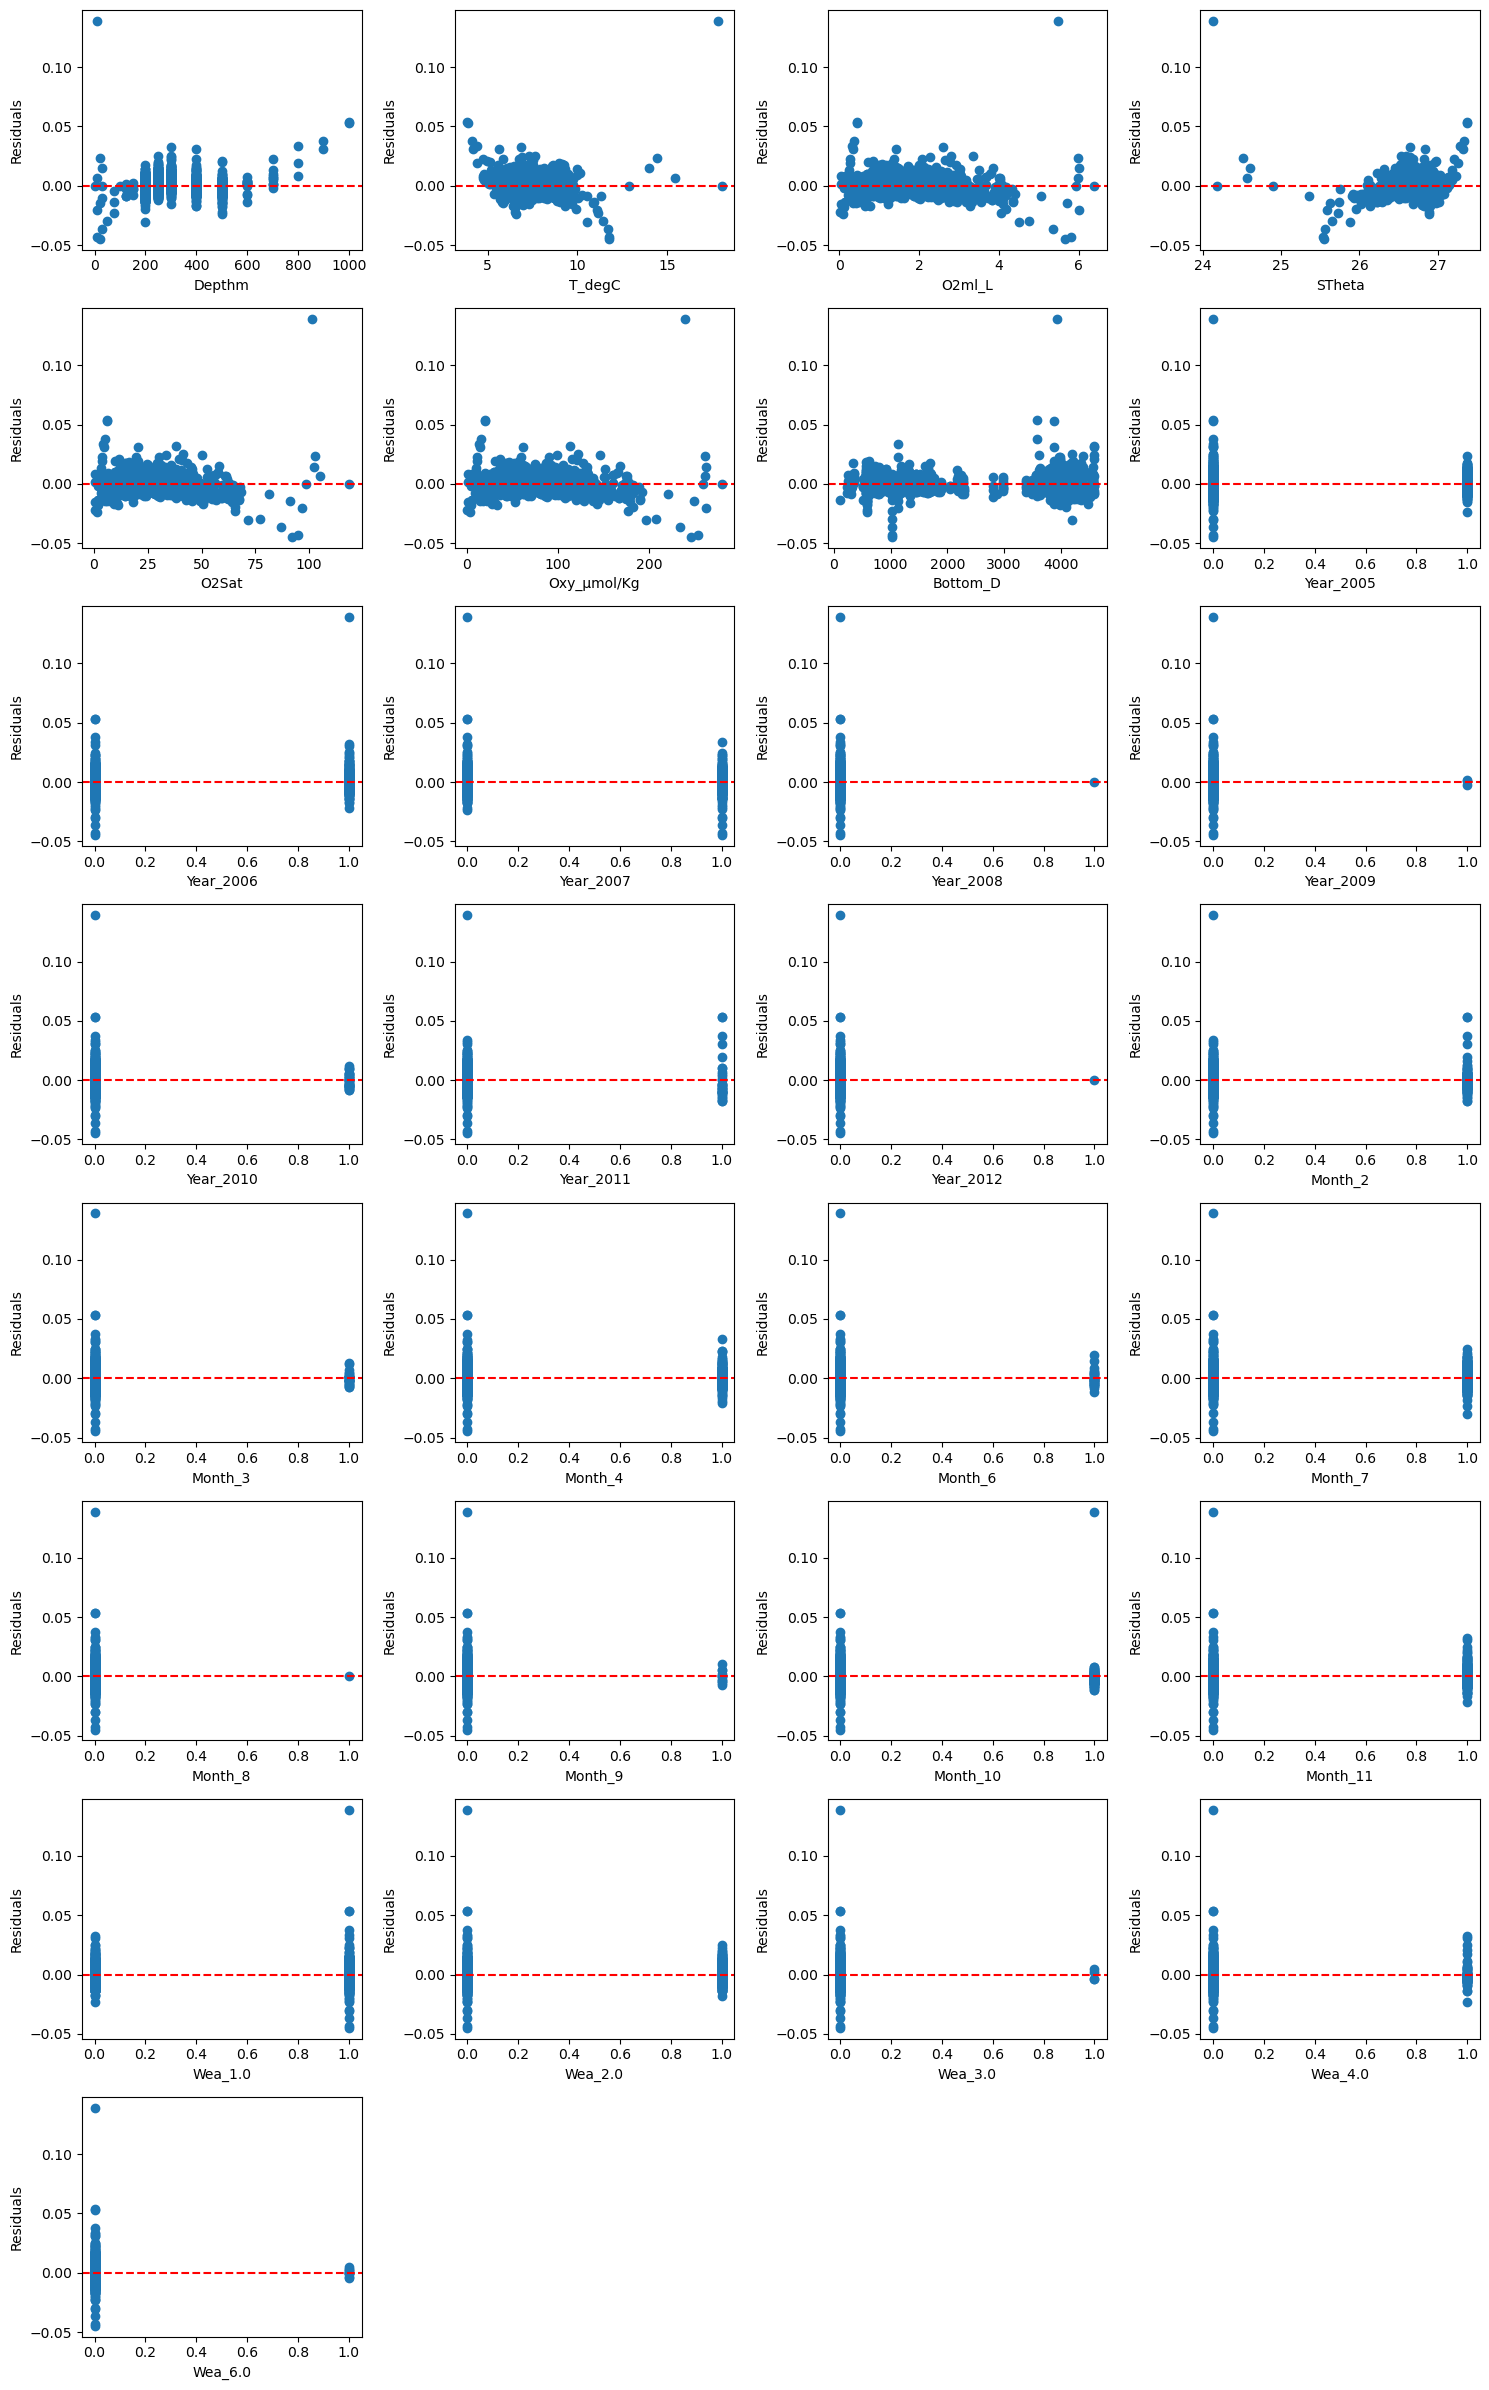

In [30]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


residuals = model.resid


predictors = x  # Use all the predictor variables


num_predictors = len(predictors.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))


for i, col in enumerate(predictors.columns):
    ax = axes.flatten()[i]
    ax.scatter(predictors[col], residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.axhline(0, color='red', linestyle='--')


for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


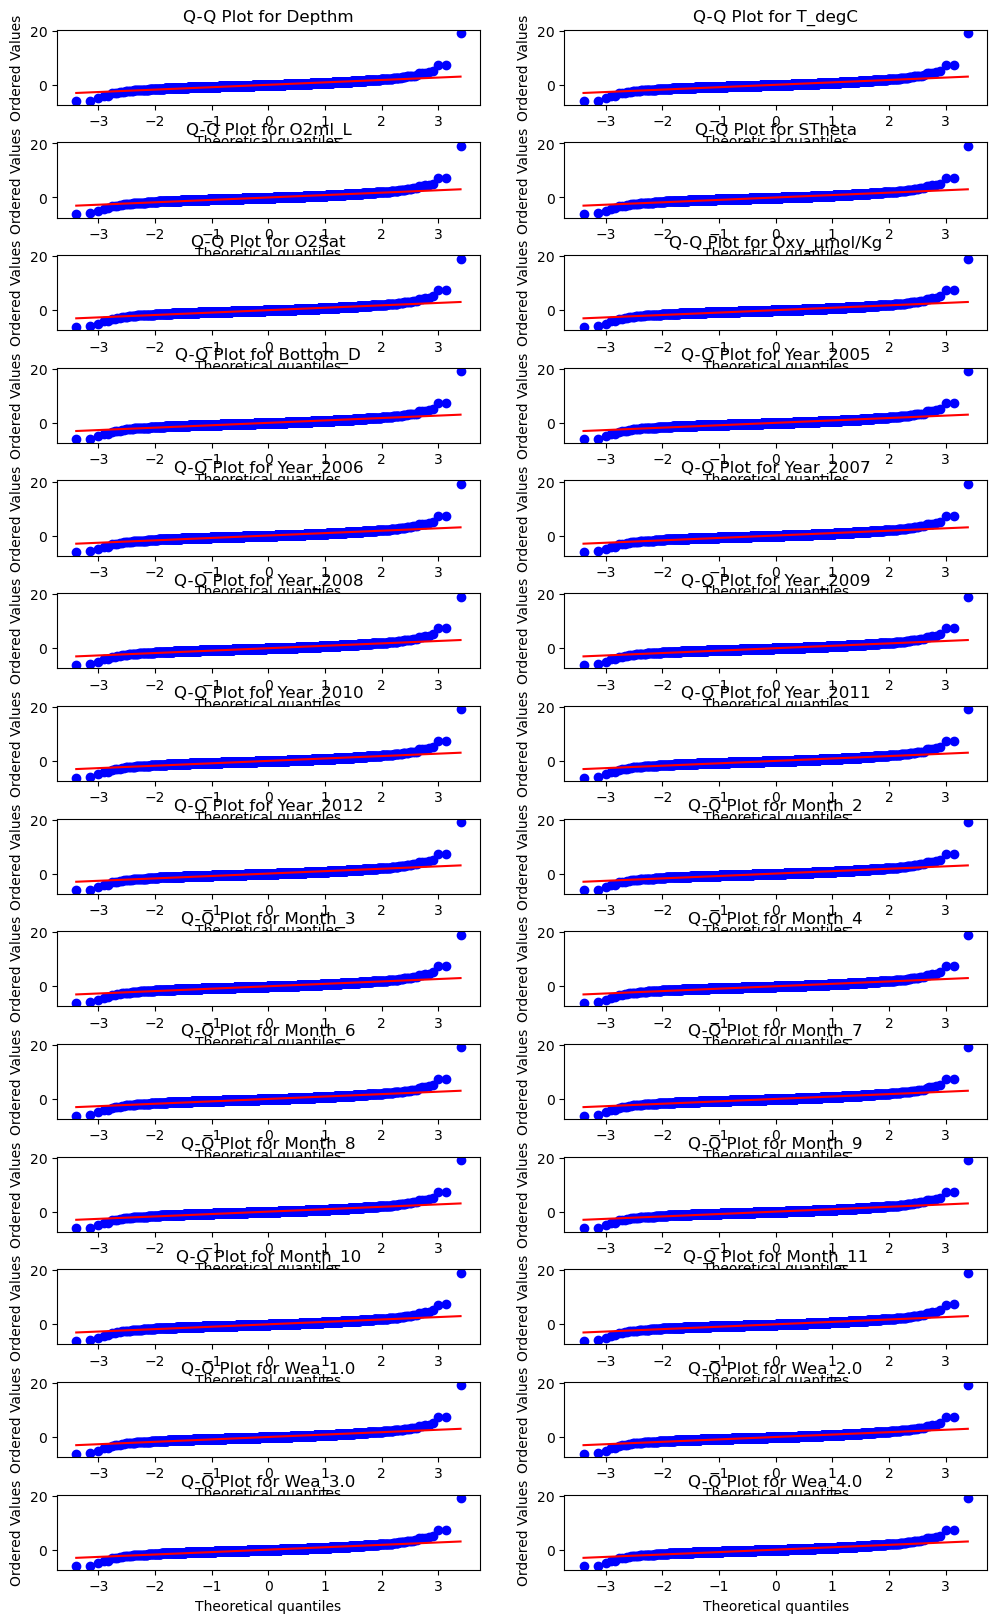

In [36]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns


residuals = model.resid


std_resid = residuals / np.std(residuals)


predictor_columns = x.columns


fig, axes = plt.subplots(nrows=len(predictor_columns)//2, ncols=2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

for i, (pred_col, ax) in enumerate(zip(predictor_columns, axes.flatten())):
    # Q-Q plot
    probplot(std_resid, plot=ax)
    ax.set_title(f'Q-Q Plot for {pred_col}')

plt.show()


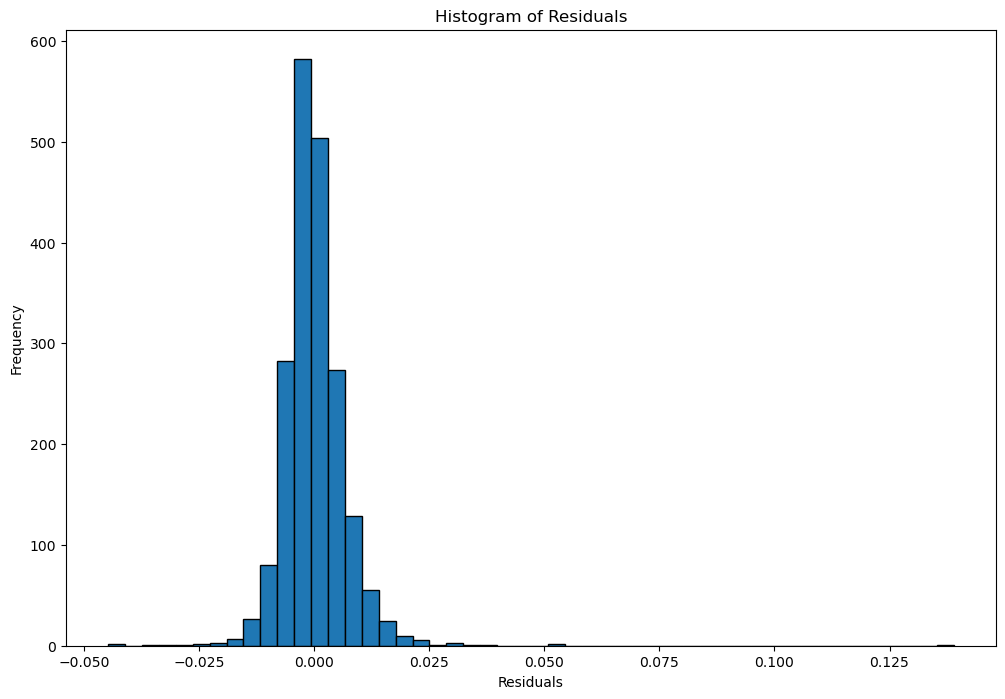

In [42]:
import matplotlib.pyplot as plt


residuals = model.resid


plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [8]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
       Variable           VIF
0         const  1.332753e+06
1        Depthm  1.324315e+01
2        T_degC  5.567321e+01
3        O2ml_L  1.094879e+08
4        STheta  1.166979e+02
5         O2Sat  1.799254e+04
6   Oxy_µmol/Kg  1.121222e+08
7      Bottom_D  2.046182e+00
8     Year_2005  3.319153e+00
9     Year_2006  3.980425e+00
10    Year_2007  3.441384e+00
11    Year_2008  1.020400e+00
12    Year_2009  1.087228e+00
13    Year_2010  2.042874e+00
14    Year_2011  1.465032e+00
15    Year_2012  2.630113e+00
16      Month_2  2.346408e+00
17      Month_3  1.192128e+00
18      Month_4  2.216438e+00
19      Month_6  1.157225e+00
20      Month_7  2.686720e+00
21      Month_8  1.312920e+00
22      Month_9  1.664546e+00
23     Month_10  1.752849e+00
24     Month_11  2.374278e+00
25      Wea_1.0  2.634940e+00
26      Wea_2.0  2.725845e+00
27      Wea_3.0  1.026677e+00
28      Wea_4.0  1.340592e+00
29      Wea_6.0  1.077144e+00


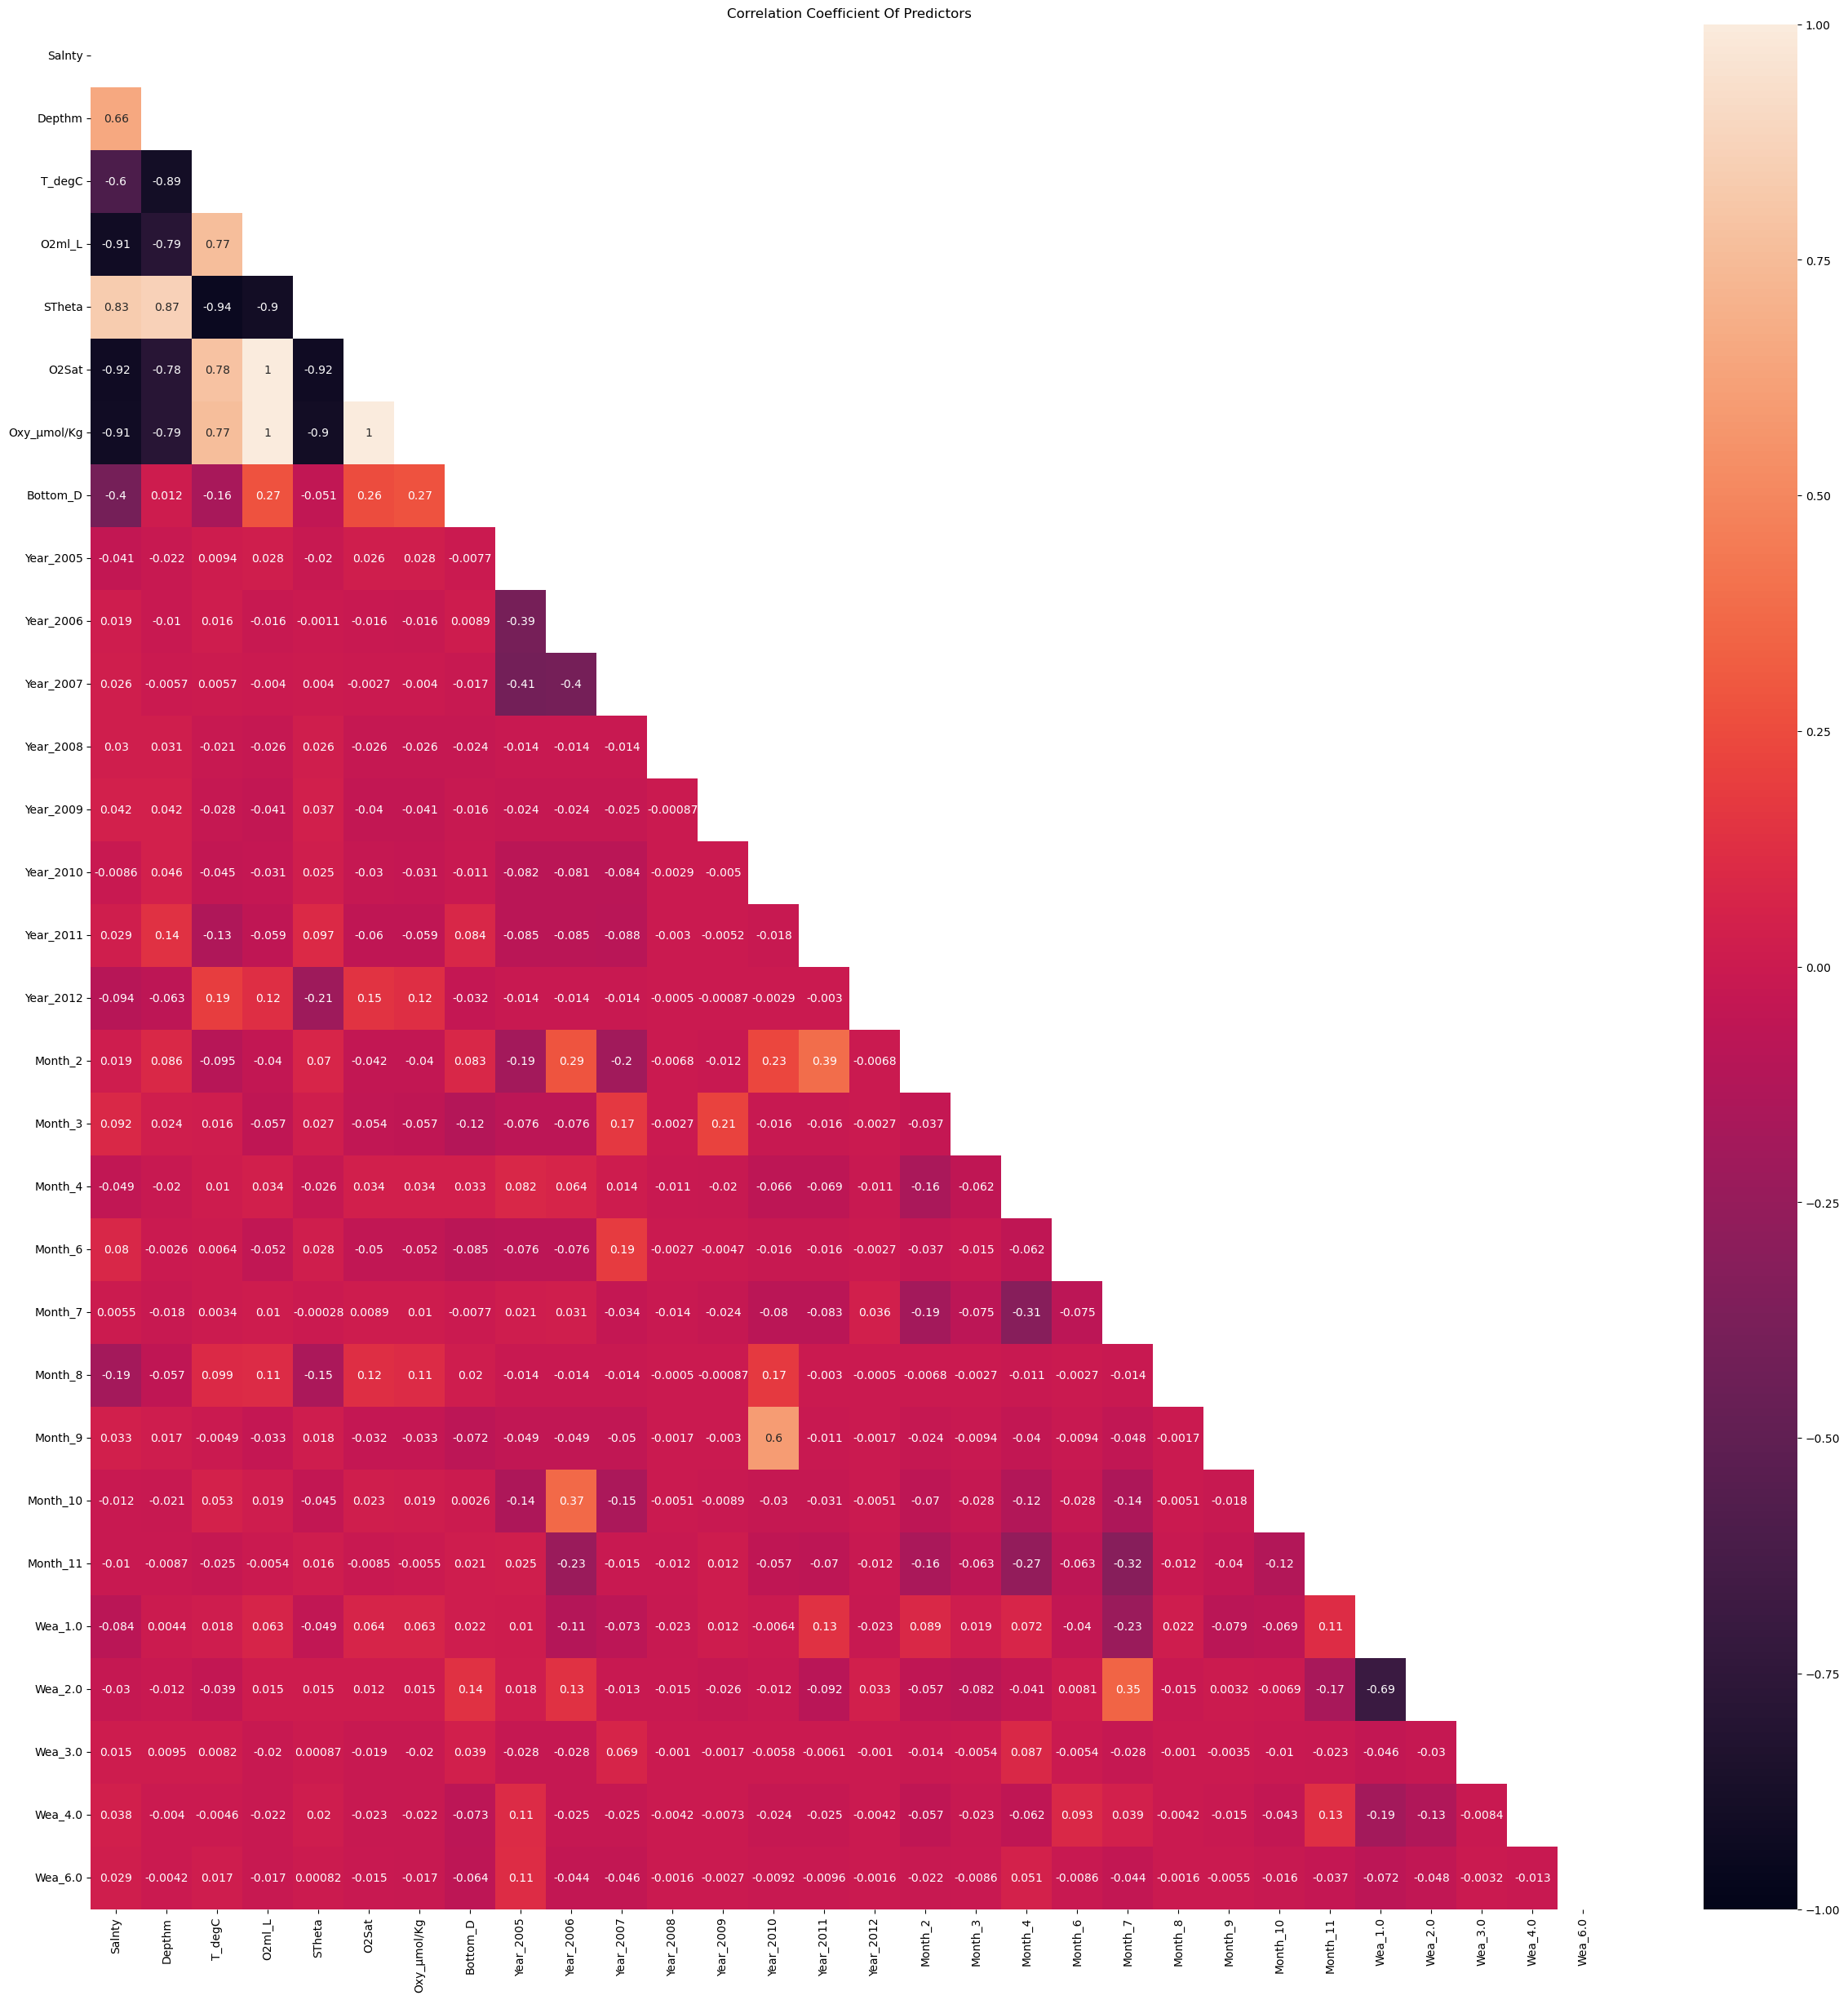

In [9]:
plt.figure(figsize=(30, 30))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(dummies.corr(), dtype=bool))

# generate heatmap
sns.heatmap(dummies.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [10]:
def compute_vif(considered_features):
    
    X = dummies[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['Depthm', 'T_degC', 'O2ml_L', 'Bottom_D', 'Year_2005', 'Year_2006', 'Year_2007', 
                       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Month_2', 'Month_3', 
                       'Month_4', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Wea_1.0', 
                       'Wea_2.0', 'Wea_3.0', 'Wea_4.0', 'Wea_6.0']
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_36174/1656234601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
1,T_degC,7.901713
0,Depthm,6.243136
2,O2ml_L,4.364460
5,Year_2006,3.943822
6,Year_2007,3.422294
4,Year_2005,3.286442
22,Wea_2.0,2.723094
16,Month_7,2.674408
21,Wea_1.0,2.616854
12,Month_2,2.418945


In [11]:
selected_columns = ['Salnty'] + considered_features

dummies2 = dummies[selected_columns]

dummies2

,Salnty,Depthm,T_degC,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,0.70,3935.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,2.08,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,1.75,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,1.20,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,0.70,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,1.12,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,0.72,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,0.40,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
x = dummies2.iloc[:, 1:]
y = dummies2.iloc[:, :1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [34.15135401]
Coefficients: 
 [[ 9.72628675e-05  2.61516861e-02 -1.40704563e-01 -8.02924743e-06
  -9.49850684e-03 -5.34504933e-03 -1.73209412e-03  1.15779129e-02
  -5.91990428e-04 -2.60547612e-02  2.71469442e-03 -1.28780837e-01
   4.04105708e-03  1.54820856e-02 -4.83552239e-03  1.85452093e-02
   9.48033403e-04 -5.57254240e-01  7.75308881e-03  3.15973379e-03
  -3.32297334e-03 -1.00030536e-02 -4.15209911e-03  5.17911697e-03
   6.15783428e-03  6.11785815e-03]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     529.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:40:41   Log-Likelihood:                 3260.7
No. Observations:                2000   AIC:       

In [14]:
y_pred = mlr.predict(x_test)
x = dummies2.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.35
Mean Absolute Error: 0.029661415389119695
Mean Square Error: 0.0022012568713127437
Root Mean Square Error: 0.04691755397836447


In [15]:
x_train_with_const = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_with_const.values, i) for i in range(x_train_with_const.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable         VIF
0       const  631.360345
1      Depthm    6.770838
2      T_degC    8.607897
3      O2ml_L    4.388822
4    Bottom_D    1.861973
5   Year_2005    3.305520
6   Year_2006    3.971490
7   Year_2007    3.428024
8   Year_2008    1.018976
9   Year_2009    1.085305
10  Year_2010    2.035917
11  Year_2011    1.463252
12  Year_2012    1.178690
13    Month_2    2.339878
14    Month_3    1.187456
15    Month_4    2.182377
16    Month_6    1.148567
17    Month_7    2.648370
18    Month_8    1.114448
19    Month_9    1.661752
20   Month_10    1.750802
21   Month_11    2.364490
22    Wea_1.0    2.613781
23    Wea_2.0    2.719144
24    Wea_3.0    1.025553
25    Wea_4.0    1.340053
26    Wea_6.0    1.075651


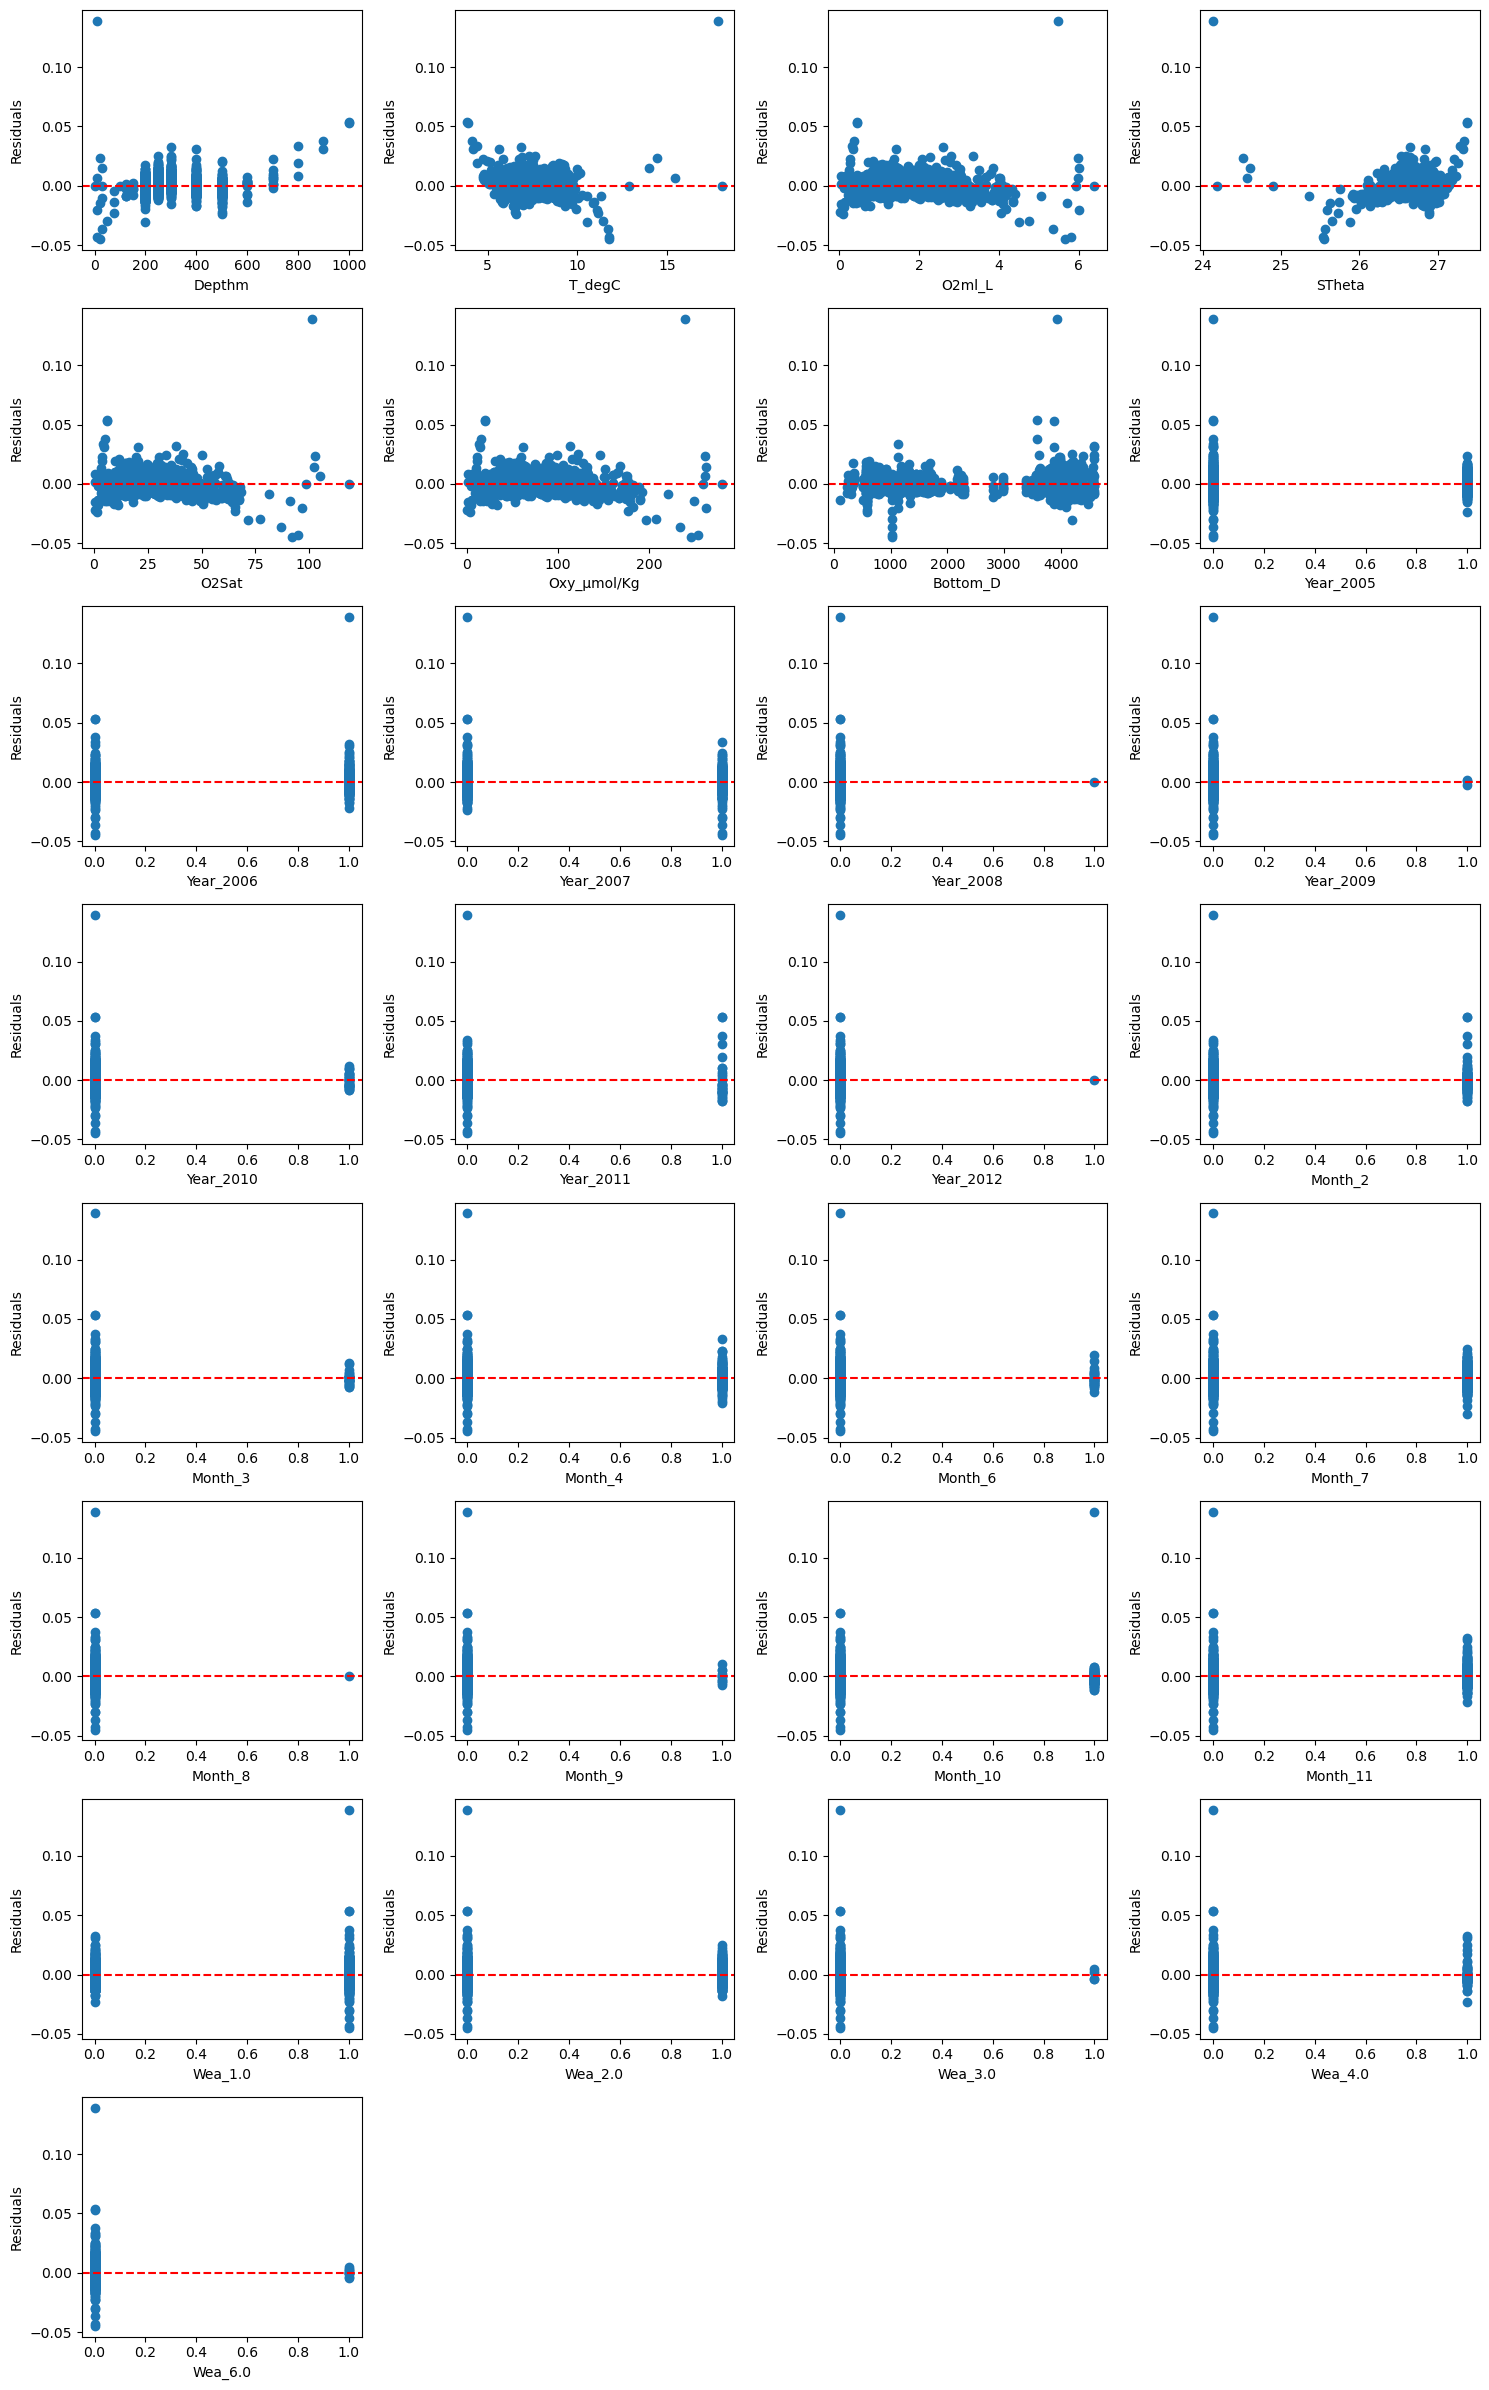

In [40]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


residuals = model.resid


predictors = x  # Use all the predictor variables


num_predictors = len(predictors.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))


for i, col in enumerate(predictors.columns):
    ax = axes.flatten()[i]
    ax.scatter(predictors[col], residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.axhline(0, color='red', linestyle='--')


for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


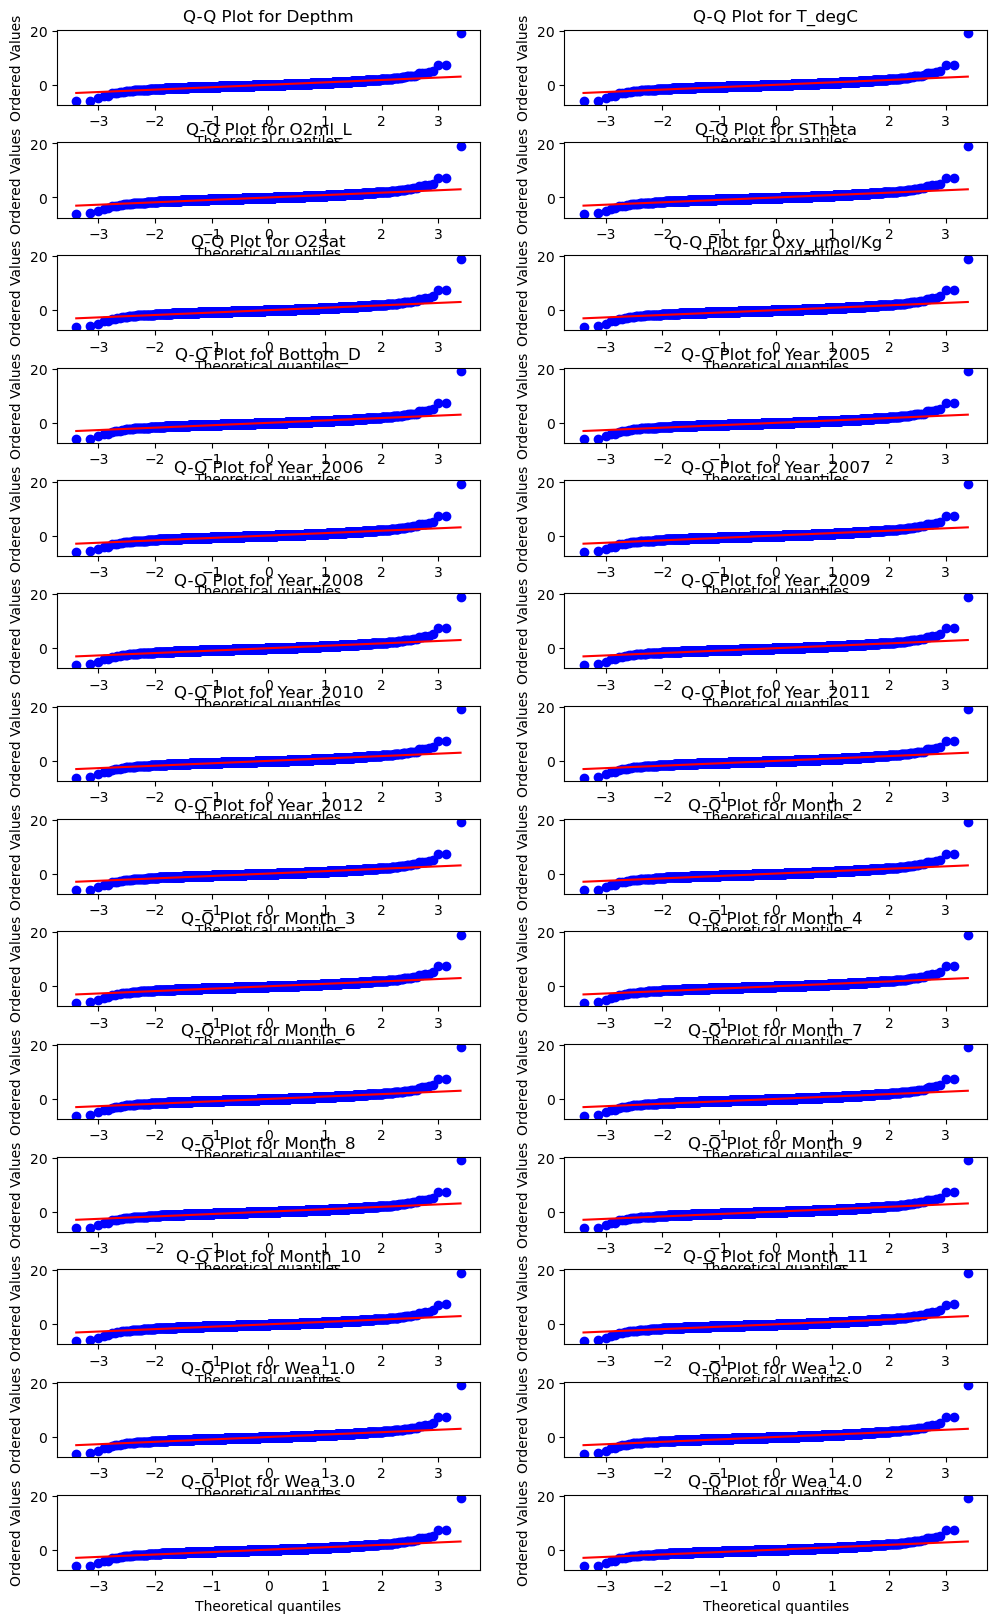

In [41]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns


residuals = model.resid


std_resid = residuals / np.std(residuals)


predictor_columns = x.columns


fig, axes = plt.subplots(nrows=len(predictor_columns)//2, ncols=2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

for i, (pred_col, ax) in enumerate(zip(predictor_columns, axes.flatten())):
    # Q-Q plot
    probplot(std_resid, plot=ax)
    ax.set_title(f'Q-Q Plot for {pred_col}')

plt.show()


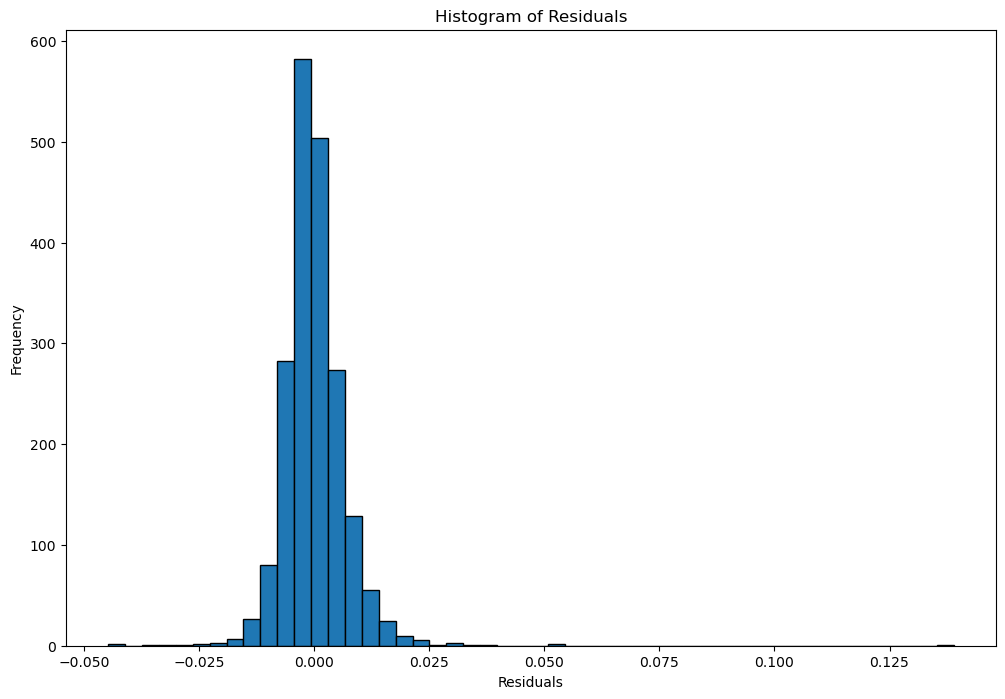

In [43]:
import matplotlib.pyplot as plt


residuals = model.resid


plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
